# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

Fino ad ora, abbiamo approssimato il calcolo dell'energia potenziale del sistema imponendo un cutoff sopra il quale il contributo del potenziale a due corpi veniva trascurato. A lezione, abbiamo osservato come sia possibile tenere conto di tale correzione nel limite in cui la funzione di distribuzione radiale (vedi gli altri esercizi) è circa pari a 1. Le correzioni sono le seguenti:
$$
    \frac{U_{tail}}{N} = 8\pi \frac{\rho}{\sigma^3}\epsilon \Bigl[\frac{1}{9}\bigl(\frac{\sigma}{r_c}\bigr)^9-\frac{1}{3}\bigl(\frac{\sigma}{r_c}\bigr)^3 \Bigr] = \frac{8 \pi \rho_{LJ}}{9r_{c(LJ)}^9}-\frac{8 \pi \rho_{LJ}}{3r_{c(LJ)}^3}
$$

$$
    P_{tail} = 32\pi \frac{\rho}{\sigma^3} \Bigl[\frac{1}{9}\bigl(\frac{\sigma}{r_c}\bigr)^9-\frac{1}{6}\bigl(\frac{\sigma}{r_c}\bigr)^3 \Bigr] = \frac{32 \pi \rho_{LJ}}{9r_{c(LJ)}^9}-\frac{32 \pi \rho_{LJ}}{6r_{c(LJ)}^3}
$$

dove le grandezze con il pedice LJ si intendono in unità di Lennard-Jones.

Si possono dare delle stime per queste quantità:

- Fase solida con $\rho_{LJ}=1.1$ e $r_{c(LJ)}=2.2$: $~~~~$ $U_{tail}/N \simeq - 0.86$, $~~~~$ $P_{tail} \simeq -1.72$
- Fase liquida con $\rho_{LJ}=0.8$ e $r_{c(LJ)}=2.5$: $~~~~$ $U_{tail}/N \simeq - 0.42$, $~~~~$ $P_{tail} \simeq -0.85$
- Fase gassosa con $\rho_{LJ}=0.05$ e $r_{c(LJ)}=5$: $~~~~$ $U_{tail}/N \simeq - 0.0035$, $~~~~$ $P_{tail} \simeq - 0.006$

Questi valori rappresentano una correzione alla pressione di circa il 15% per la fase solida, il 35% per la fase liquida e il 12% per la fase gassosa.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

Abbiamo visto più volte in questo corso quanto sia fondamentale e centrale il concetto di correlazione. Nel codice utilizzato, i dati vengono acquisiti a ogni step, evolvendo il sistema dal tempo precedente: è dunque ovvio che i dati ai tempi successivi dipendano da quelli ai tempi precedenti. Per evitare effetti di correlazione tra una misura e l'altra, abbiamo introdotto la tecnica della media a blocchi. Questa tecnica consiste nel raggruppare le misure effettuate in blocchi di uguale lunghezza e, da questi, estrarre il valore medio che rappresenta una misura effettiva della quantità di interesse.

Vogliamo studiare come si comporta l'autocorrelazione tra la misura di una quantità a un certo istante $t$ e $t+\Delta t$. In particolare, ci interessa capire dopo quanto tempo queste due misure possono considerarsi scorrelate tra loro.

Per fare questo, possiamo ottenere istante per istante, ad esempio, l'energia potenziale per particella del sistema e, al variare di $t$, calcolare:
\begin{equation}
\chi(t) = \frac{\displaystyle \frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t} U(t')U(t'+t)-\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t} U(t') \times \frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t} U(t'+t)}{\displaystyle \frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} U^2(t')-\Bigl(\frac{1}{t_{max}} \sum_{t'=0}^{t_{max}} U(t')\Bigr)^2}
\end{equation}

Questa espressione ci indicherà dopo quanto tempo la misura al tempo $t$ dipenderà da quella al tempo $t=0$.

Quindi, quello che ho fatto è stato stampare, per tutte e tre le fasi, l'energia potenziale per particella istantanea (dopo averla equilibrata) per un numero di step $t_{max} = 500000$ (un numero molto maggiore rispetto all'effettiva correlazione che mi aspetto). Dopodiché, ho calcolato l'autocorrelazione definita precedentemente per $t \in [0, 200]$ con passi di 2. Nella figura riportata si può osservare proprio l'andamento in funzione di $t$.

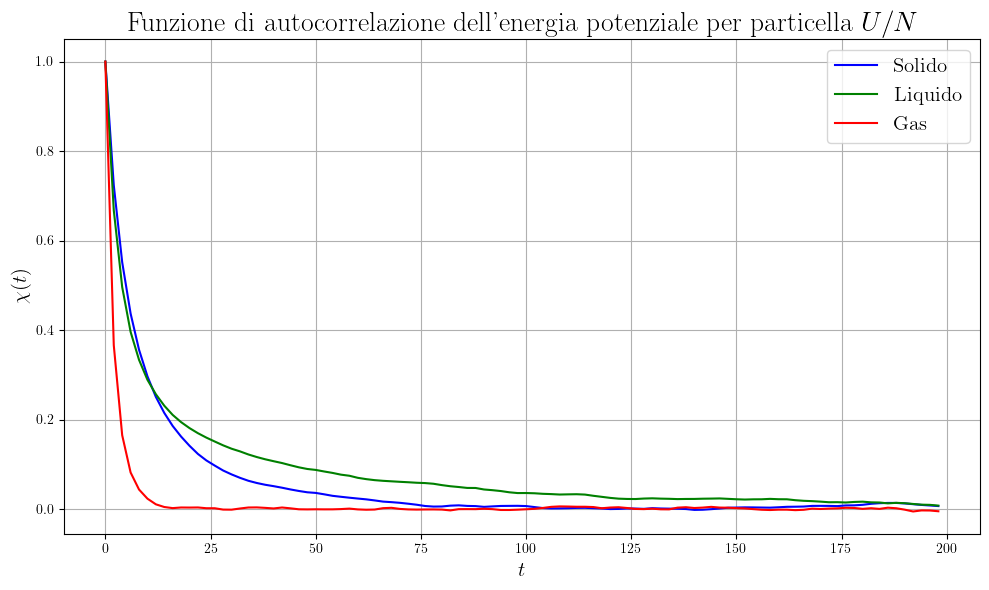

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Carica i dati dal primo file
data1 = np.loadtxt('esercizio7.2/potential_energy_solid.dat')
# Assumi che i dati siano nella seconda colonna
serie1 = data1[:, 1]

# Calcola la lunghezza dei dati
tmax = len(serie1)

# Ripeti lo stesso procedimento per il secondo file
data2 = np.loadtxt('esercizio7.2/potential_energy_liquid.dat')
serie2 = data2[:, 1]

# Ripeti per il terzo file
data3 = np.loadtxt('esercizio7.2/potential_energy_gas.dat')
serie3 = data3[:, 1]

# Definisci le funzioni necessarie
def somma_prod(t, tmax, v):
    somma_ = 0
    for i in range(0, tmax - t):
        somma_ += v[i] * v[i + t]
    return somma_

def somma1(t, tmax, v):
    somma__ = 0
    for i in range(0, tmax - t):
        somma__ += v[i]
    return somma__

def somma2(t, tmax, v):
    somma___ = 0
    for i in range(0, tmax - t):
        somma___ += v[i + t]
    return somma___

somma_sqd1 = np.sum(serie1 ** 2)
somma_1 = np.sum(serie1)

somma_sqd2 = np.sum(serie2 ** 2)
somma_2 = np.sum(serie2)

somma_sqd3 = np.sum(serie3 ** 2)
somma_3 = np.sum(serie3)

def corr(t, tmax, v, somma_sqd, somma):
    correl = (somma_prod(t, tmax, v) / (tmax - t) - somma1(t, tmax, v) * somma2(t, tmax, v)/(tmax - t)**2) / (somma_sqd / tmax - (somma / tmax)**2)
    return correl

# Definisci l'intervallo di tempo t
t = np.arange(0, 200, 2, dtype=int)
corre1 = np.zeros(len(t))
corre2 = np.zeros(len(t))
corre3 = np.zeros(len(t))
for i in range(0,len(t)):
    corre1[i] = corr(t[i], tmax, serie1, somma_sqd1, somma_1)
    corre2[i] = corr(t[i], tmax, serie2, somma_sqd2, somma_2)
    corre3[i] = corr(t[i], tmax, serie3, somma_sqd3, somma_3)

# Plotta i risultati
plt.figure(figsize=(10, 6))

plt.plot(t, corre1, label='Solido', color='blue')
plt.plot(t, corre2, label='Liquido', color='green')
plt.plot(t, corre3, label='Gas', color='red')

plt.xlabel('$t$', fontsize=15)
plt.ylabel(r'$\chi(t)$', fontsize=15)
plt.title('Funzione di autocorrelazione dell\'energia potenziale per particella $U/N$', fontsize=20, fontweight = "bold")
plt.legend(fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.show()


Come si può notare, in generale l'autocorrelazione diventa trascurabile dopo circa un centinaio di step. In tutte e tre le fasi, intorno a $t=200$, l'autocorrelazione diventa insignificante. È interessante osservare che tale fenomeno è meno evidente nella fase gassosa. Questo si spiega facilmente considerando il moto caotico e disordinato delle particelle in un gas, dove le proprietà fisiche di una particella possono cambiare radicalmente in breve tempo.

La fase liquida mostra la maggiore correlazione, probabilmente perché le particelle, pur essendo abbastanza mobili per consentire una dinamica caotica, sono sufficientemente vincolate dalle forze del potenziale di Lennard-Jones per mantenere una coerenza temporale nelle loro interazioni.

Quando si stima una grandezza con l'incertezza statistica associata, è importante considerare l'effetto delle correlazioni tra le misure. Se le misure sono correlate, c'è il rischio di sottostimare l'incertezza statistica. Il metodo della media a blocchi, come abbiamo ampiamente discusso, è utile per affrontare questo problema. Tuttavia, è cruciale scegliere con cura la lunghezza di ciascun blocco in modo da evitare problemi di correlazione. D'altra parte, una lunghezza del blocco troppo estesa può ridurre significativamente il numero di misure nel dataset finale, compromettendo la precisione della misura finale.

Ho quindi proceduto al calcolo dell'incertezza della misura finale, ottenuta come deviazione standard delle medie dei blocchi, variando la lunghezza dei blocchi. Nei grafici seguenti, ho riutilizzato i dati precedenti, utilizzando dimensioni del blocco che vanno da 10 a 5000 (garantendo così almeno 100 misure per blocco).

Questa analisi ci permette di determinare la lunghezza ottimale del blocco per ottenere una stima precisa dell'incertezza statistica, bilanciando efficacemente la necessità di ridurre le correlazioni tra le misure con il mantenimento di un numero sufficiente di dati per una stima affidabile.

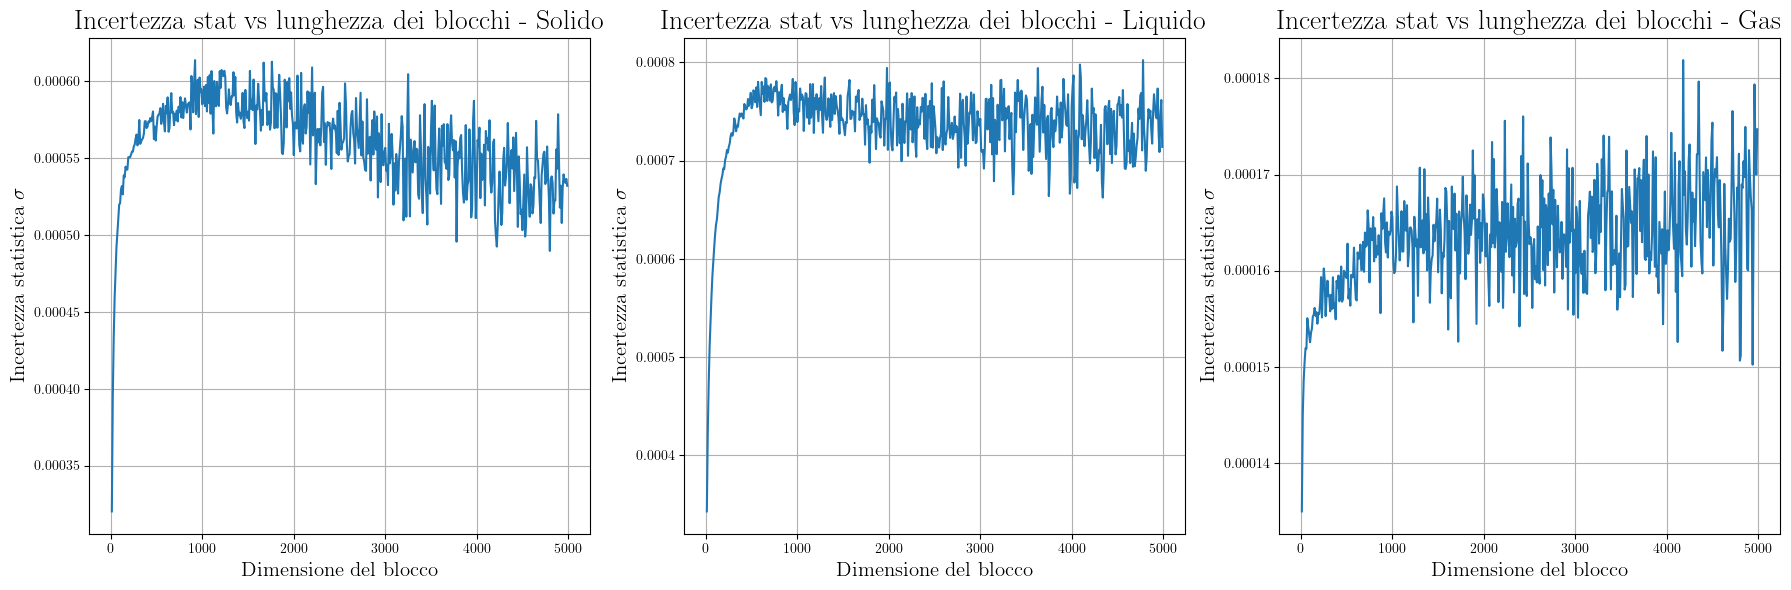

In [23]:
# Funzione per calcolare l'Incertezza stat vs lunghezza dei blocchi
def block_error(serie, tmax):
    x = np.arange(10, 5000, 10)
    block_err = np.zeros(len(x))
    k = 0
    for lung in x:
        N = int(tmax/lung)
        s = 0
        s2 = 0
        for j in range(0, N):
            somma = 0
            for i in range(j*lung, (j+1)*lung):
                somma += serie[i]
            s += somma/lung
            s2 += (somma/lung)**2
        block_err[k] = np.sqrt((s2/N-(s/N)**2)/(N+1))
        k = k + 1
    return x, block_err

# Calcola l'ncertezza stat vs lunghezza dei blocchi per ogni serie di dati
x1, block_err1 = block_error(serie1, len(serie1))
x2, block_err2 = block_error(serie2, len(serie2))
x3, block_err3 = block_error(serie3, len(serie3))

# Plotta i risultati
plt.figure(figsize=(18, 6))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.subplot(1, 3, 1)
plt.plot(x1, block_err1, label='Solido')
plt.xlabel('Dimensione del blocco', fontsize = 15)
plt.ylabel('Incertezza statistica $\sigma$', fontsize = 15)
plt.title('Incertezza stat vs lunghezza dei blocchi - Solido', fontsize = 20)
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(x2, block_err2, label='Liquido')
plt.xlabel('Dimensione del blocco', fontsize = 15)
plt.ylabel('Incertezza statistica $\sigma$', fontsize = 15)
plt.title('Incertezza stat vs lunghezza dei blocchi - Liquido', fontsize = 20)
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x3, block_err3, label='Gas')
plt.xlabel('Dimensione del blocco', fontsize = 15)
plt.ylabel('Incertezza statistica $\sigma$', fontsize = 15)
plt.title('Incertezza stat vs lunghezza dei blocchi - Gas', fontsize = 20)
plt.grid(True)

plt.tight_layout()
plt.show()


Si noti che, come previsto, l'incertezza risulta sottostimata con blocchi di circa meno di 500 step, come evidenziato in precedenza. Inoltre, oltre i 1000 step per blocco, l'incertezza non mostra più una crescita significativa e tende a stabilizzarsi: questo indica che gli effetti di autocorrelazione sono stati mitigati e l'incertezza stimata riflette più accuratamente quella reale.

Infine, come già osservato nei grafici precedenti, la fase gassosa mostra la minore autocorrelazione rispetto alle altre fasi.

Queste osservazioni sottolineano l'importanza di scegliere una lunghezza adeguata per i blocchi nell'analisi statistica, per garantire una stima corretta dell'incertezza e interpretazioni precise dei dati ottenuti.

### Exercise 07.3

Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

La funzione di distribuzione radiale è una grandezza fondamentale per un sistema termodinamico come un solido, un liquido o un gas. Essa rappresenta la densità di probabilità di trovare una particella a una distanza compresa tra $r$ e $r+dr$ da un'altra, normalizzata rispetto al caso di gas ideale (senza interazioni). La sua espressione matematica è data da:
$$
g(r) = \frac{1}{\rho N \Delta V(r)} \left\langle \sum_{i \neq j} \delta\left( r - |\vec{r_i} - \vec{r_j}| \right) \right\rangle
$$
dove $\rho$ è la densità del sistema, $N$ è il numero di particelle, e $\Delta V(r)$ è il volume differenziale sferico tra $r$ e $r+dr$, definito come:
$$
    \Delta V (r) = \frac{4\pi}{3}[(r+dr)^3-r^3]
$$

Nel codice, il calcolo della funzione di distribuzione radiale consiste nel riempimento di un istogramma. Questo avviene incrementando di 2 il conteggio di un bin ogni volta che due particelle nel sistema si trovano a una distanza compresa tra $r$ e $r+dr$.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

Vogliamo ora confrontare la Dinamica Molecolare con l'algoritmo di Metropolis per la simulazione del comportamento dell'Argon. Nonostante entrambi i metodi siano capaci di calcolare le stesse quantità, sono molto diversi nel loro approccio:

- La Dinamica Molecolare si basa sulla risoluzione delle equazioni del moto delle particelle nel sistema, simulando direttamente il loro moto nel tempo.
- Con l'algoritmo di Metropolis, invece, si campionano direttamente le configurazioni del sistema secondo una distribuzione di probabilità data dal peso di Boltzmann.

La differenza principale è che nella Dinamica Molecolare si opera nell'ensemble microcanonico (dove l'energia è conservata), mentre con l'algoritmo di Metropolis si opera nell'ensemble canonico (dove la temperatura è costante). L'equivalenza tra i due è garantita solo nel limite termodinamico, che richiede un numero molto grande di particelle.

Nei grafici seguenti, presento il confronto tra i due metodi. Per ottenere risultati significativi, ho utilizzato i seguenti parametri, combinando le informazioni sulla termalizzazione discusse nella lezione 4 e considerando il comportamento dell'autocorrelazione precedentemente analizzato:

- NBLOCKS= 20
- NSTEPS= 2000
- SALTA_NBLOCKS= 5

Per quanto riguarda l'algoritmo di Metropolis, l'accettazione è stata regolata manualmente per rispettare la regola empirica del 50%:

- Solido: delta = 0.055 ==> accettazione $\simeq$ 0.509
- Liquido: delta = 0.1 ==> accetazione $\simeq$ 0.511
- Gas: delta = 10 ==> accettazione $\simeq$ 0.620

Infine, per garantire che le due simulazioni fossero alla stessa temperatura, ho inizialmente fissato la temperatura nella Dinamica Molecolare in modo che il sistema raggiungesse l'equilibrio a una temperatura approssimativa desiderata. Successivamente, ho selezionato la temperatura per l'algoritmo di Metropolis in modo che le due coincidessero.

Questo approccio ci consente di confrontare efficacemente i risultati ottenuti dai due metodi di simulazione, considerando le loro rispettive caratteristiche e assicurando che siano confrontabili in termini di temperatura e ensemble termodinamico.

### 1) Fase solida

/tmp/ipykernel_17231/1004727053.py:21: RuntimeWarning: invalid value encountered in divide
  ratio_gofr = data_gofr_mc[:, 2] / data_gofr_md[:, 2]
/tmp/ipykernel_17231/1004727053.py:22: RuntimeWarning: invalid value encountered in divide
  err_ratio_gofr = ratio_gofr*np.sqrt((data_gofr_mc[:, 3]/data_gofr_mc[:, 2])**2 + (data_gofr_md[:, 3]/data_gofr_md[:, 2])**2)


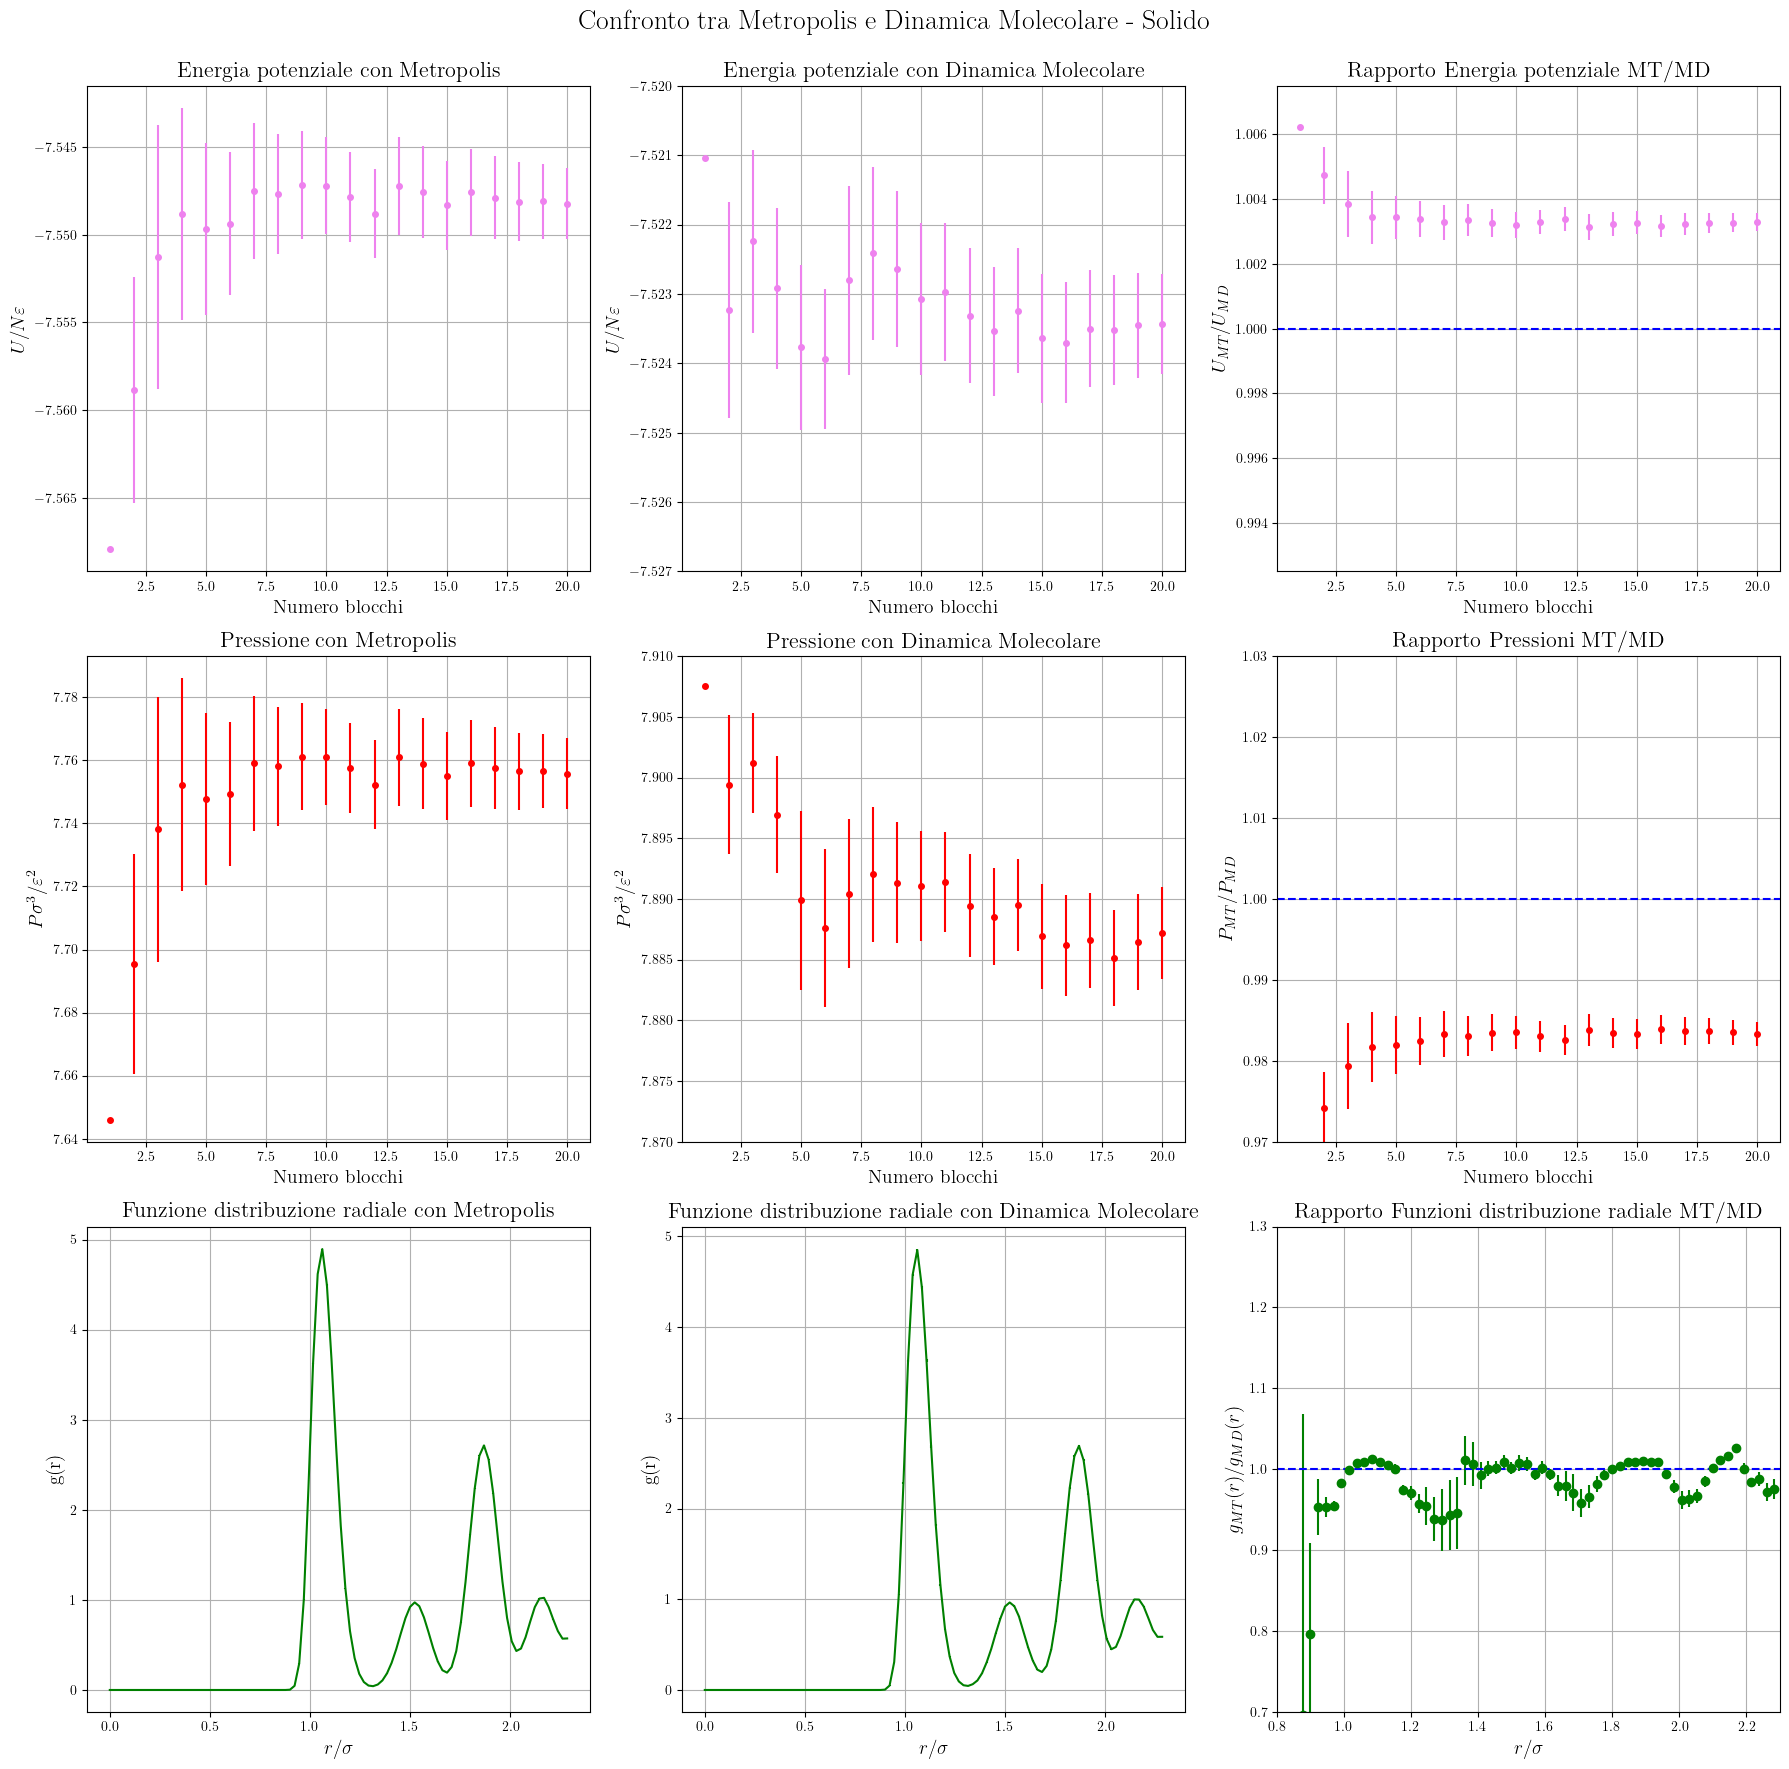

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati simulazione Monte Carlo (solid)
data_pe_mc = np.loadtxt('esercizio7.4/solid/OUTPUT1/potential_energy.dat')
data_press_mc = np.loadtxt('esercizio7.4/solid/OUTPUT1/pressure.dat')
data_gofr_mc = np.loadtxt('esercizio7.4/solid/OUTPUT1/gofr.dat')

# Caricamento dati dinamica molecolare (solid)
data_pe_md = np.loadtxt('esercizio7.4/solid/OUTPUT0/potential_energy.dat')
data_press_md = np.loadtxt('esercizio7.4/solid/OUTPUT0/pressure.dat')
data_gofr_md = np.loadtxt('esercizio7.4/solid/OUTPUT0/gofr.dat')

# Calcolo delle ratioerenze per potenziale energetico, pressione e g(r)
ratio_pe = data_pe_mc[:, 2] / data_pe_md[:, 2]
err_ratio_pe = ratio_pe*np.sqrt((data_pe_mc[:, 3]/data_pe_mc[:, 2])**2 + (data_pe_md[:, 3]/data_pe_md[:, 2])**2)

ratio_press = data_press_mc[:, 2] / data_press_md[:, 2]
err_ratio_press = ratio_press*np.sqrt((data_press_mc[:, 3]/data_press_mc[:, 2])**2 + (data_press_md[:, 3]/data_press_md[:, 2])**2)

ratio_gofr = data_gofr_mc[:, 2] / data_gofr_md[:, 2]
err_ratio_gofr = ratio_gofr*np.sqrt((data_gofr_mc[:, 3]/data_gofr_mc[:, 2])**2 + (data_gofr_md[:, 3]/data_gofr_md[:, 2])**2)

# Dimensioni della figura
plt.figure(figsize=(18, 18))

# Plot per potenziale energetico Monte Carlo
plt.subplot(3, 3, 1)
plt.errorbar(data_pe_mc[:, 0], data_pe_mc[:, 2], yerr=data_pe_mc[:, 3], fmt='o', color='violet', label='Monte Carlo', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$U/N\varepsilon$', fontsize=14)
plt.title('Energia potenziale con Metropolis', fontsize=16)
plt.grid(True)

# Plot per potenziale energetico Dinamica Molecolare
plt.subplot(3, 3, 2)
plt.errorbar(data_pe_md[:, 0], data_pe_md[:, 2], yerr=data_pe_md[:, 3], fmt='o', color='violet', label='Molecular Dynamics', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$U/N\varepsilon$', fontsize=14)
plt.title('Energia potenziale con Dinamica Molecolare', fontsize=16)
plt.ylim(-7.527,-7.520)
plt.grid(True)

# Plot per Rapporto di potenziale energetico
plt.subplot(3, 3, 3)
plt.errorbar(data_pe_mc[:, 0], ratio_pe, yerr=err_ratio_pe, fmt='o', color='violet', label='(MC/MD)', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.axhline(y=1, color='blue', linestyle='--')
plt.ylabel(r'$U_{MT}/U_{MD}$', fontsize=14)
plt.title('Rapporto Energia potenziale MT/MD', fontsize=16)
plt.ylim(0.9925,1.0075)
plt.grid(True)

# Plot per pressione Monte Carlo
plt.subplot(3, 3, 4)
plt.errorbar(data_press_mc[:, 0], data_press_mc[:, 2], yerr=data_press_mc[:, 3], fmt='o', color='red', label='Monte Carlo', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P\sigma^3/\varepsilon^2$', fontsize=14)
plt.title('Pressione con Metropolis', fontsize=16)
plt.grid(True)

# Plot per pressione Dinamica Molecolare
plt.subplot(3, 3, 5)
plt.errorbar(data_press_md[:, 0], data_press_md[:, 2], yerr=data_press_md[:, 3], fmt='o', color='red', label='Molecular Dynamics', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P\sigma^3/\varepsilon^2$', fontsize=14)
plt.title('Pressione con Dinamica Molecolare', fontsize=16)
plt.ylim(7.87,7.91)
plt.grid(True)

# Plot per Rapporto di pressione
plt.subplot(3, 3, 6)
plt.errorbar(data_press_mc[:, 0], ratio_press, yerr=err_ratio_press, fmt='o', color='red', label='(MC/MD)', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P_{MT}/P_{MD}$', fontsize=14)
plt.axhline(y=1, color='blue', linestyle='--')
plt.title('Rapporto Pressioni MT/MD', fontsize=16)
plt.ylim(0.97,1.03)
plt.grid(True)

# Plot per funzione di distribuzione radiale Monte Carlo
plt.subplot(3, 3, 7)
plt.errorbar(data_gofr_mc[:, 0], data_gofr_mc[:, 2], yerr=data_gofr_mc[:, 3], fmt='-', color='green', label='Monte Carlo')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel('g(r)', fontsize=14)
plt.title('Funzione distribuzione radiale con Metropolis', fontsize=16)
plt.grid(True)

# Plot per funzione di distribuzione radiale Dinamica Molecolare
plt.subplot(3, 3, 8)
plt.errorbar(data_gofr_md[:, 0], data_gofr_md[:, 2], yerr=data_gofr_md[:, 3], fmt='-', color='green', label='Molecular Dynamics')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel('g(r)', fontsize=14)
plt.title('Funzione distribuzione radiale con Dinamica Molecolare', fontsize=16)
plt.grid(True)

# Plot per Rapporto di g(r)
plt.subplot(3, 3, 9)
plt.errorbar(data_gofr_mc[:, 0], ratio_gofr, yerr=err_ratio_gofr, fmt='o', color='green', label='(MC/MD)')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel(r'$g_{MT}(r)/g_{MD}(r)$', fontsize=14)
plt.xlim(0.8, 2.3)
plt.ylim(0.7,1.3)
plt.axhline(y=1, color='blue', linestyle='--')
plt.title('Rapporto Funzioni distribuzione radiale MT/MD', fontsize=16)
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Per evitare sovrapposizioni
plt.suptitle('Confronto tra Metropolis e Dinamica Molecolare - Solido', fontsize=20)
plt.show()


### 2) Fase liquida

/tmp/ipykernel_17231/433312476.py:21: RuntimeWarning: divide by zero encountered in divide
  ratio_gofr = data_gofr_mc[:, 2] / data_gofr_md[:, 2]
/tmp/ipykernel_17231/433312476.py:21: RuntimeWarning: invalid value encountered in divide
  ratio_gofr = data_gofr_mc[:, 2] / data_gofr_md[:, 2]
/tmp/ipykernel_17231/433312476.py:22: RuntimeWarning: invalid value encountered in divide
  err_ratio_gofr = ratio_gofr*np.sqrt((data_gofr_mc[:, 3]/data_gofr_mc[:, 2])**2 + (data_gofr_md[:, 3]/data_gofr_md[:, 2])**2)


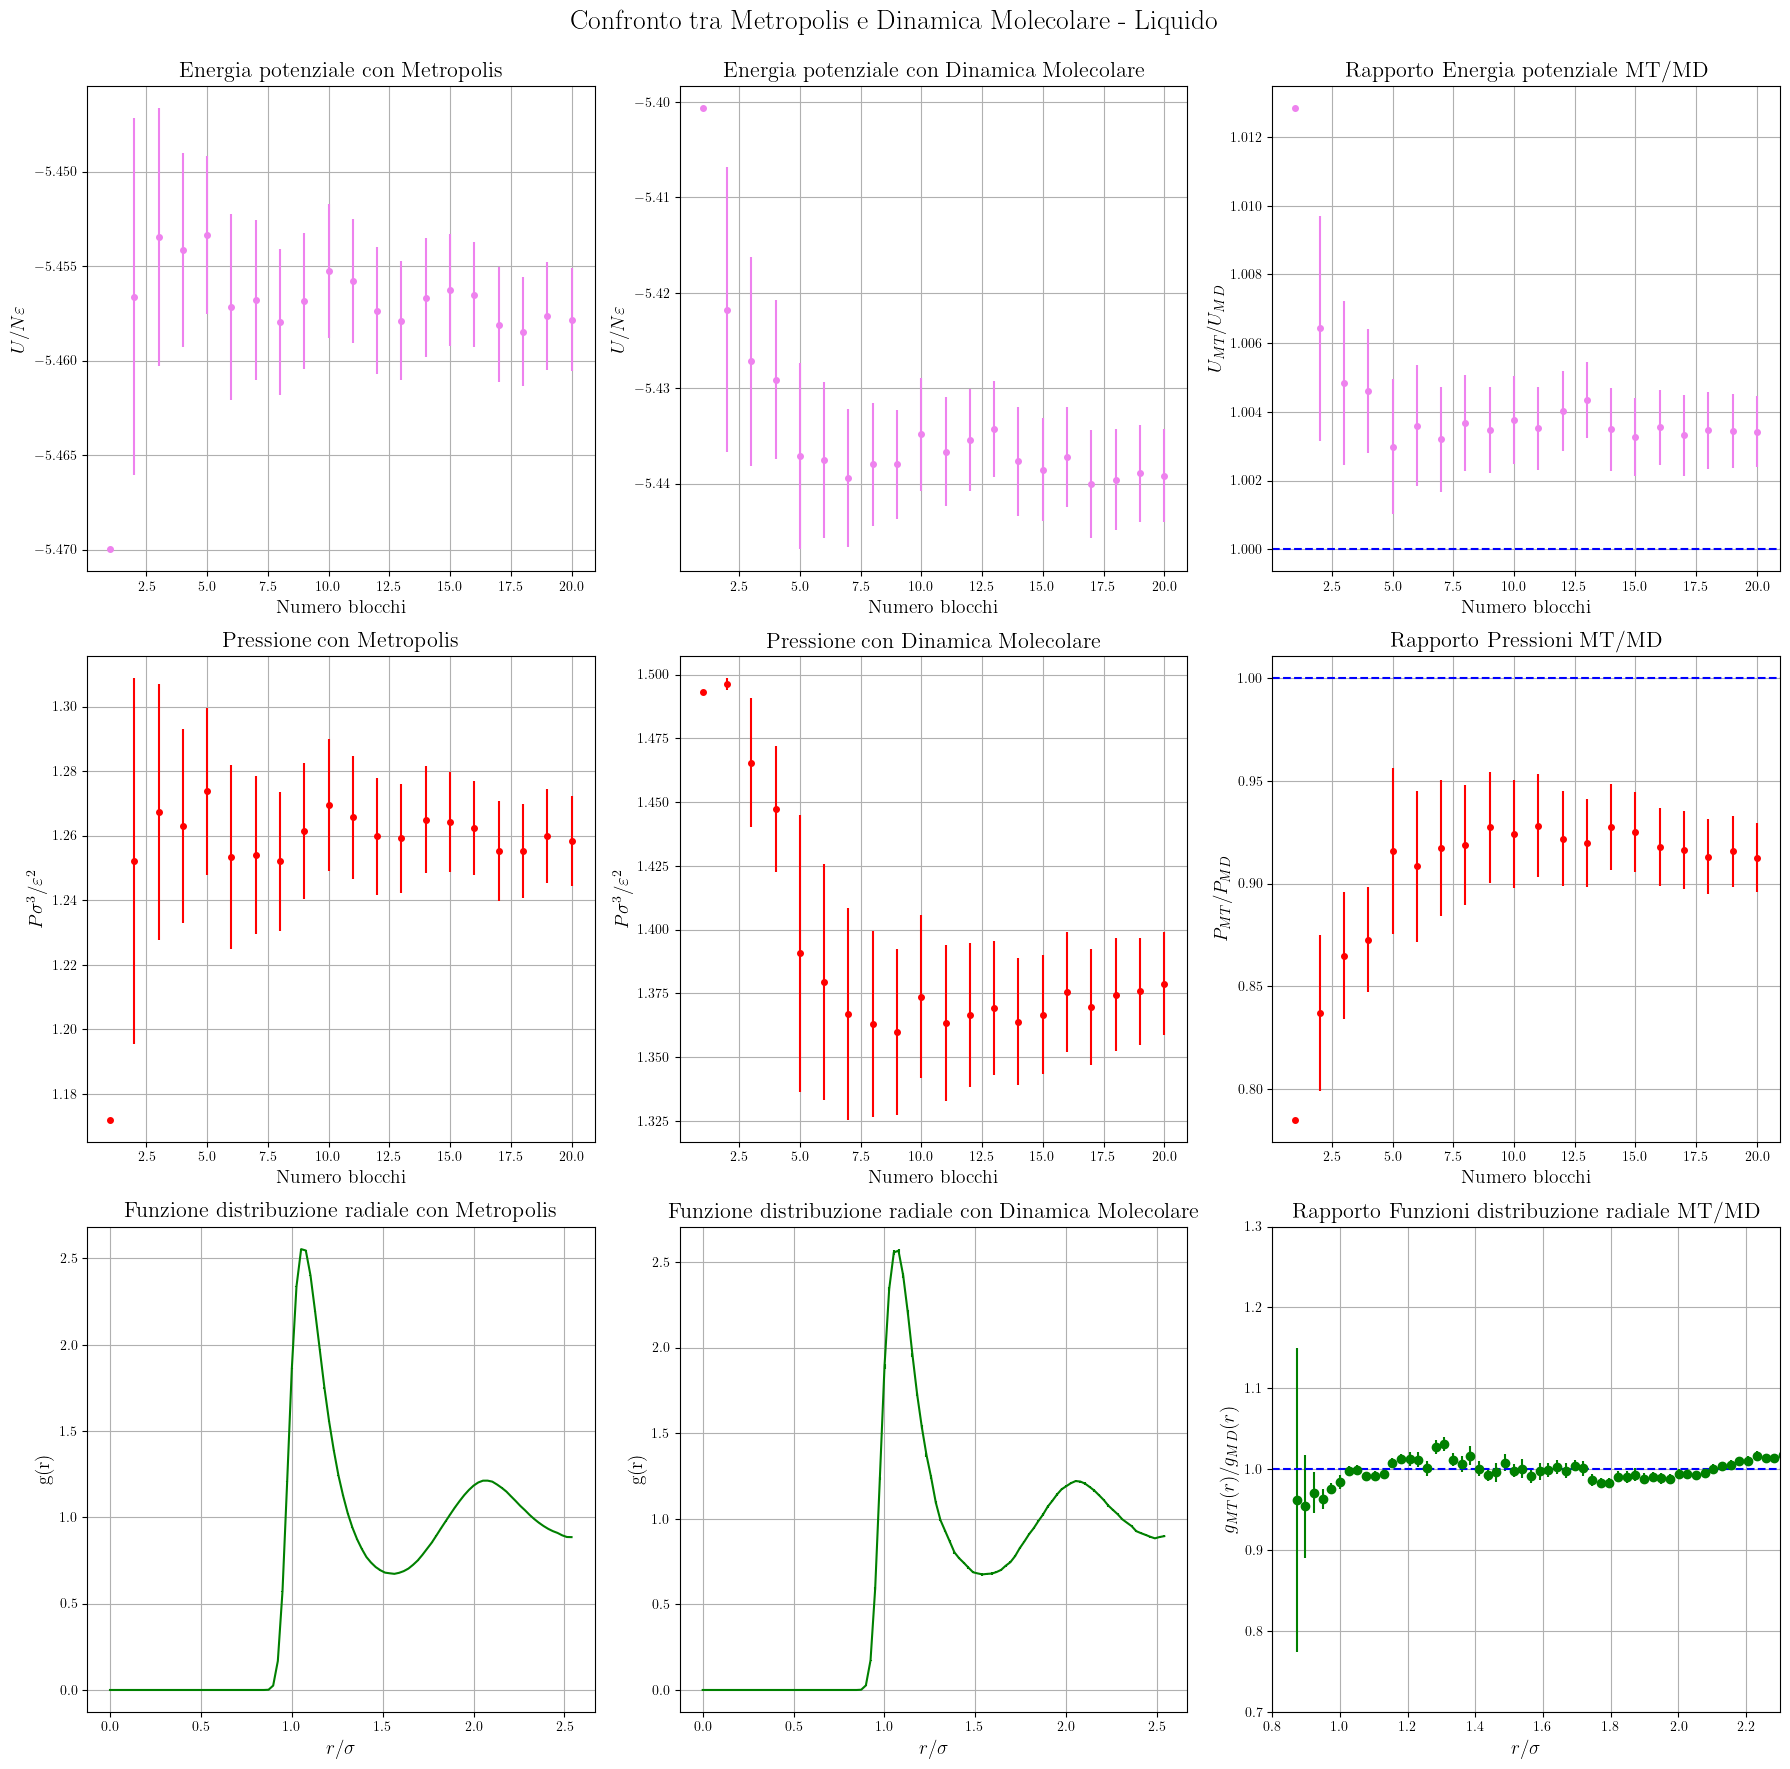

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati simulazione Monte Carlo (liquid)
data_pe_mc = np.loadtxt('esercizio7.4/liquid/OUTPUT1/potential_energy.dat')
data_press_mc = np.loadtxt('esercizio7.4/liquid/OUTPUT1/pressure.dat')
data_gofr_mc = np.loadtxt('esercizio7.4/liquid/OUTPUT1/gofr.dat')

# Caricamento dati dinamica molecolare (liquid)
data_pe_md = np.loadtxt('esercizio7.4/liquid/OUTPUT0/potential_energy.dat')
data_press_md = np.loadtxt('esercizio7.4/liquid/OUTPUT0/pressure.dat')
data_gofr_md = np.loadtxt('esercizio7.4/liquid/OUTPUT0/gofr.dat')

# Calcolo delle ratioerenze per potenziale energetico, pressione e g(r)
ratio_pe = data_pe_mc[:, 2] / data_pe_md[:, 2]
err_ratio_pe = ratio_pe*np.sqrt((data_pe_mc[:, 3]/data_pe_mc[:, 2])**2 + (data_pe_md[:, 3]/data_pe_md[:, 2])**2)

ratio_press = data_press_mc[:, 2] / data_press_md[:, 2]
err_ratio_press = ratio_press*np.sqrt((data_press_mc[:, 3]/data_press_mc[:, 2])**2 + (data_press_md[:, 3]/data_press_md[:, 2])**2)

ratio_gofr = data_gofr_mc[:, 2] / data_gofr_md[:, 2]
err_ratio_gofr = ratio_gofr*np.sqrt((data_gofr_mc[:, 3]/data_gofr_mc[:, 2])**2 + (data_gofr_md[:, 3]/data_gofr_md[:, 2])**2)

# Dimensioni della figura
plt.figure(figsize=(18, 18))

# Plot per potenziale energetico Monte Carlo
plt.subplot(3, 3, 1)
plt.errorbar(data_pe_mc[:, 0], data_pe_mc[:, 2], yerr=data_pe_mc[:, 3], fmt='o', color='violet', label='Monte Carlo', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$U/N\varepsilon$', fontsize=14)
plt.title('Energia potenziale con Metropolis', fontsize=16)
plt.grid(True)

# Plot per potenziale energetico Dinamica Molecolare
plt.subplot(3, 3, 2)
plt.errorbar(data_pe_md[:, 0], data_pe_md[:, 2], yerr=data_pe_md[:, 3], fmt='o', color='violet', label='Molecular Dynamics', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$U/N\varepsilon$', fontsize=14)
plt.title('Energia potenziale con Dinamica Molecolare', fontsize=16)
#plt.ylim(-7.527,-7.520)
plt.grid(True)

# Plot per Rapporto di potenziale energetico
plt.subplot(3, 3, 3)
plt.errorbar(data_pe_mc[:, 0], ratio_pe, yerr=err_ratio_pe, fmt='o', color='violet', label='(MC/MD)', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.axhline(y=1, color='blue', linestyle='--')
plt.ylabel(r'$U_{MT}/U_{MD}$', fontsize=14)
plt.title('Rapporto Energia potenziale MT/MD', fontsize=16)
#plt.ylim(0.9925,1.0075)
plt.grid(True)

# Plot per pressione Monte Carlo
plt.subplot(3, 3, 4)
plt.errorbar(data_press_mc[:, 0], data_press_mc[:, 2], yerr=data_press_mc[:, 3], fmt='o', color='red', label='Monte Carlo', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P\sigma^3/\varepsilon^2$', fontsize=14)
plt.title('Pressione con Metropolis', fontsize=16)
plt.grid(True)

# Plot per pressione Dinamica Molecolare
plt.subplot(3, 3, 5)
plt.errorbar(data_press_md[:, 0], data_press_md[:, 2], yerr=data_press_md[:, 3], fmt='o', color='red', label='Molecular Dynamics', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P\sigma^3/\varepsilon^2$', fontsize=14)
plt.title('Pressione con Dinamica Molecolare', fontsize=16)
#plt.ylim(7.87,7.91)
plt.grid(True)

# Plot per Rapporto di pressione
plt.subplot(3, 3, 6)
plt.errorbar(data_press_mc[:, 0], ratio_press, yerr=err_ratio_press, fmt='o', color='red', label='(MC/MD)', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P_{MT}/P_{MD}$', fontsize=14)
plt.axhline(y=1, color='blue', linestyle='--')
plt.title('Rapporto Pressioni MT/MD', fontsize=16)
#plt.ylim(0.97,1.03)
plt.grid(True)

# Plot per funzione di distribuzione radiale Monte Carlo
plt.subplot(3, 3, 7)
plt.errorbar(data_gofr_mc[:, 0], data_gofr_mc[:, 2], yerr=data_gofr_mc[:, 3], fmt='-', color='green', label='Monte Carlo')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel('g(r)', fontsize=14)
plt.title('Funzione distribuzione radiale con Metropolis', fontsize=16)
plt.grid(True)

# Plot per funzione di distribuzione radiale Dinamica Molecolare
plt.subplot(3, 3, 8)
plt.errorbar(data_gofr_md[:, 0], data_gofr_md[:, 2], yerr=data_gofr_md[:, 3], fmt='-', color='green', label='Molecular Dynamics')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel('g(r)', fontsize=14)
plt.title('Funzione distribuzione radiale con Dinamica Molecolare', fontsize=16)
plt.grid(True)

# Plot per Rapporto di g(r)
plt.subplot(3, 3, 9)
plt.errorbar(data_gofr_mc[:, 0], ratio_gofr, yerr=err_ratio_gofr, fmt='o', color='green', label='(MC/MD)')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel(r'$g_{MT}(r)/g_{MD}(r)$', fontsize=14)
plt.xlim(0.8, 2.3)
plt.ylim(0.7,1.3)
plt.axhline(y=1, color='blue', linestyle='--')
plt.title('Rapporto Funzioni distribuzione radiale MT/MD', fontsize=16)
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Per evitare sovrapposizioni
plt.suptitle('Confronto tra Metropolis e Dinamica Molecolare - Liquido', fontsize=20)
plt.show()

### 3) Fase gassosa

/tmp/ipykernel_17231/4153869125.py:21: RuntimeWarning: invalid value encountered in divide
  ratio_gofr = data_gofr_mc[:, 2] / data_gofr_md[:, 2]
/tmp/ipykernel_17231/4153869125.py:22: RuntimeWarning: invalid value encountered in divide
  err_ratio_gofr = ratio_gofr*np.sqrt((data_gofr_mc[:, 3]/data_gofr_mc[:, 2])**2 + (data_gofr_md[:, 3]/data_gofr_md[:, 2])**2)


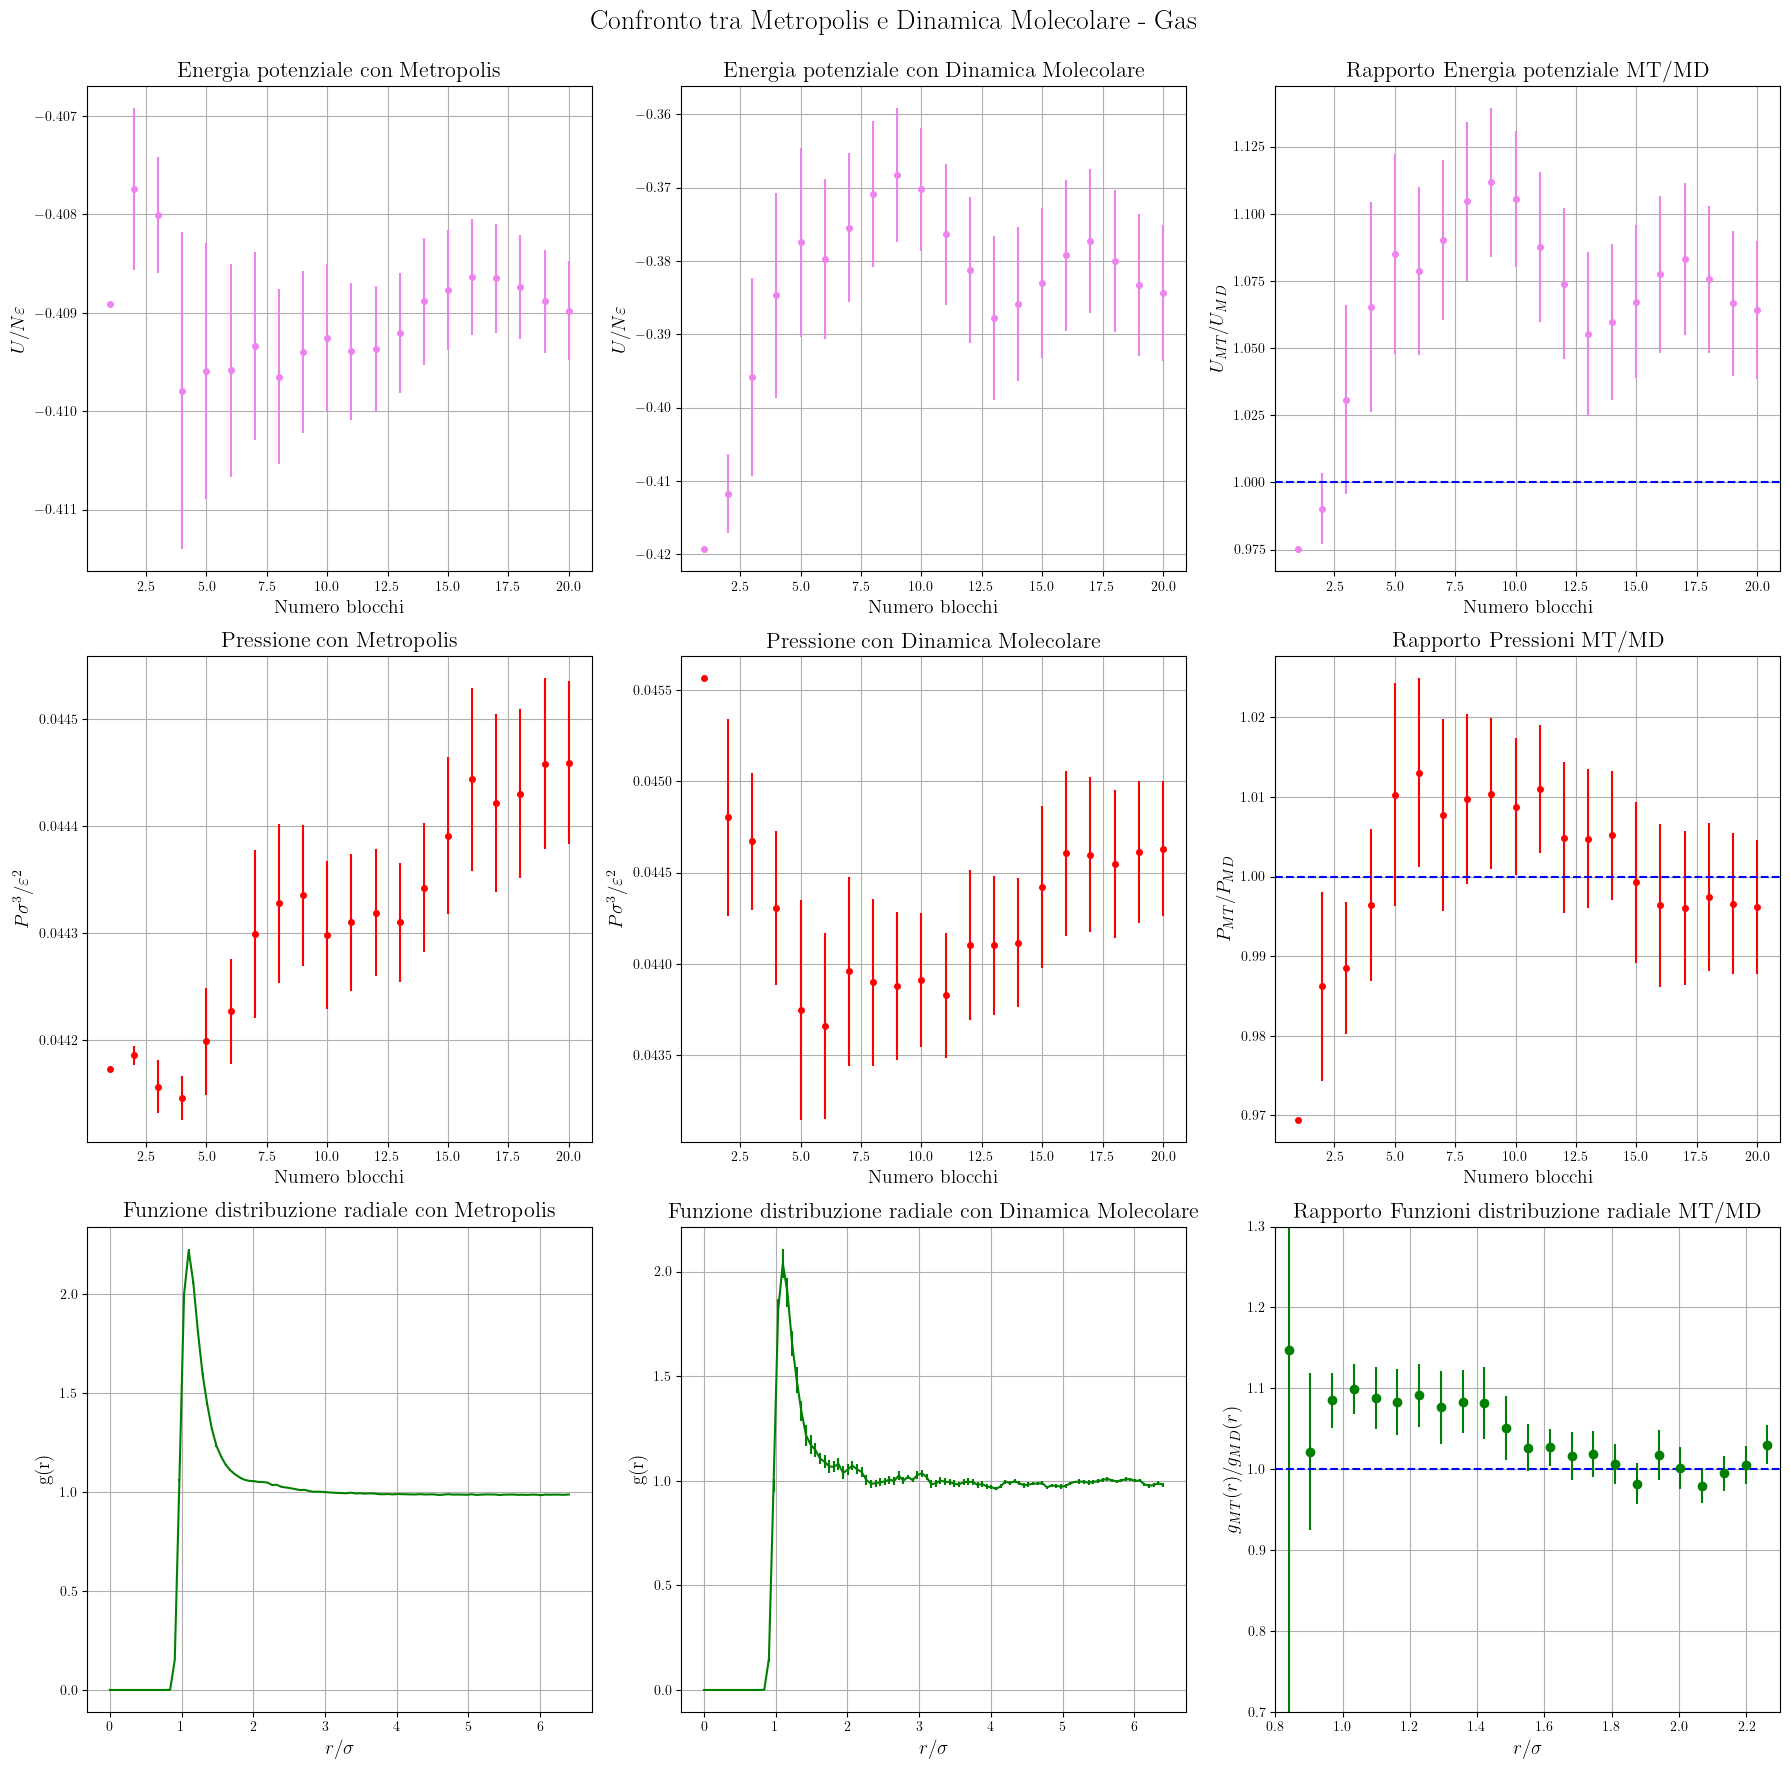

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati simulazione Monte Carlo (gas)
data_pe_mc = np.loadtxt('esercizio7.4/gas/OUTPUT1/potential_energy.dat')
data_press_mc = np.loadtxt('esercizio7.4/gas/OUTPUT1/pressure.dat')
data_gofr_mc = np.loadtxt('esercizio7.4/gas/OUTPUT1/gofr.dat')

# Caricamento dati dinamica molecolare (gas)
data_pe_md = np.loadtxt('esercizio7.4/gas/OUTPUT0/potential_energy.dat')
data_press_md = np.loadtxt('esercizio7.4/gas/OUTPUT0/pressure.dat')
data_gofr_md = np.loadtxt('esercizio7.4/gas/OUTPUT0/gofr.dat')

# Calcolo delle ratioerenze per potenziale energetico, pressione e g(r)
ratio_pe = data_pe_mc[:, 2] / data_pe_md[:, 2]
err_ratio_pe = ratio_pe*np.sqrt((data_pe_mc[:, 3]/data_pe_mc[:, 2])**2 + (data_pe_md[:, 3]/data_pe_md[:, 2])**2)

ratio_press = data_press_mc[:, 2] / data_press_md[:, 2]
err_ratio_press = ratio_press*np.sqrt((data_press_mc[:, 3]/data_press_mc[:, 2])**2 + (data_press_md[:, 3]/data_press_md[:, 2])**2)

ratio_gofr = data_gofr_mc[:, 2] / data_gofr_md[:, 2]
err_ratio_gofr = ratio_gofr*np.sqrt((data_gofr_mc[:, 3]/data_gofr_mc[:, 2])**2 + (data_gofr_md[:, 3]/data_gofr_md[:, 2])**2)

# Dimensioni della figura
plt.figure(figsize=(18, 18))

# Plot per potenziale energetico Monte Carlo
plt.subplot(3, 3, 1)
plt.errorbar(data_pe_mc[:, 0], data_pe_mc[:, 2], yerr=data_pe_mc[:, 3], fmt='o', color='violet', label='Monte Carlo', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$U/N\varepsilon$', fontsize=14)
plt.title('Energia potenziale con Metropolis', fontsize=16)
plt.grid(True)

# Plot per potenziale energetico Dinamica Molecolare
plt.subplot(3, 3, 2)
plt.errorbar(data_pe_md[:, 0], data_pe_md[:, 2], yerr=data_pe_md[:, 3], fmt='o', color='violet', label='Molecular Dynamics', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$U/N\varepsilon$', fontsize=14)
plt.title('Energia potenziale con Dinamica Molecolare', fontsize=16)
#plt.ylim(-7.527,-7.520)
plt.grid(True)

# Plot per Rapporto di potenziale energetico
plt.subplot(3, 3, 3)
plt.errorbar(data_pe_mc[:, 0], ratio_pe, yerr=err_ratio_pe, fmt='o', color='violet', label='(MC/MD)', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.axhline(y=1, color='blue', linestyle='--')
plt.ylabel(r'$U_{MT}/U_{MD}$', fontsize=14)
plt.title('Rapporto Energia potenziale MT/MD', fontsize=16)
#plt.ylim(0.9925,1.0075)
plt.grid(True)

# Plot per pressione Monte Carlo
plt.subplot(3, 3, 4)
plt.errorbar(data_press_mc[:, 0], data_press_mc[:, 2], yerr=data_press_mc[:, 3], fmt='o', color='red', label='Monte Carlo', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P\sigma^3/\varepsilon^2$', fontsize=14)
plt.title('Pressione con Metropolis', fontsize=16)
plt.grid(True)

# Plot per pressione Dinamica Molecolare
plt.subplot(3, 3, 5)
plt.errorbar(data_press_md[:, 0], data_press_md[:, 2], yerr=data_press_md[:, 3], fmt='o', color='red', label='Molecular Dynamics', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P\sigma^3/\varepsilon^2$', fontsize=14)
plt.title('Pressione con Dinamica Molecolare', fontsize=16)
#plt.ylim(7.87,7.91)
plt.grid(True)

# Plot per Rapporto di pressione
plt.subplot(3, 3, 6)
plt.errorbar(data_press_mc[:, 0], ratio_press, yerr=err_ratio_press, fmt='o', color='red', label='(MC/MD)', markersize=4)
plt.xlabel('Numero blocchi', fontsize=14)
plt.ylabel(r'$P_{MT}/P_{MD}$', fontsize=14)
plt.axhline(y=1, color='blue', linestyle='--')
plt.title('Rapporto Pressioni MT/MD', fontsize=16)
#plt.ylim(0.97,1.03)
plt.grid(True)

# Plot per funzione di distribuzione radiale Monte Carlo
plt.subplot(3, 3, 7)
plt.errorbar(data_gofr_mc[:, 0], data_gofr_mc[:, 2], yerr=data_gofr_mc[:, 3], fmt='-', color='green', label='Monte Carlo')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel('g(r)', fontsize=14)
plt.title('Funzione distribuzione radiale con Metropolis', fontsize=16)
plt.grid(True)

# Plot per funzione di distribuzione radiale Dinamica Molecolare
plt.subplot(3, 3, 8)
plt.errorbar(data_gofr_md[:, 0], data_gofr_md[:, 2], yerr=data_gofr_md[:, 3], fmt='-', color='green', label='Molecular Dynamics')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel('g(r)', fontsize=14)
plt.title('Funzione distribuzione radiale con Dinamica Molecolare', fontsize=16)
plt.grid(True)

# Plot per Rapporto di g(r)
plt.subplot(3, 3, 9)
plt.errorbar(data_gofr_mc[:, 0], ratio_gofr, yerr=err_ratio_gofr, fmt='o', color='green', label='(MC/MD)')
plt.xlabel(r'$r/\sigma$', fontsize=14)
plt.ylabel(r'$g_{MT}(r)/g_{MD}(r)$', fontsize=14)
plt.xlim(0.8, 2.3)
plt.ylim(0.7,1.3)
plt.axhline(y=1, color='blue', linestyle='--')
plt.title('Rapporto Funzioni distribuzione radiale MT/MD', fontsize=16)
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Per evitare sovrapposizioni
plt.suptitle('Confronto tra Metropolis e Dinamica Molecolare - Gas', fontsize=20)
plt.show()

### Osservazioni

Prima di tutto, è importante notare come la funzione di distribuzione radiale $g(r)$ assuma la forma attesa: per $r<\sigma$, dove il potenziale di Lennard-Jones diventa repulsivo, troviamo poche particelle. Per valori di $r$ maggiori di $\sigma$, nella fase solida osserviamo la disposizione cristallina fcc, nella fase gassosa osserviamo il comportamento tipico di un gas ideale (eccetto per $r \simeq \sigma$, dove è presente la buca attrattiva del potenziale), e nella fase liquida vediamo una condizione mista tra le due.

Per tutte e tre le fasi, in particolare per quella solida e liquida, osserviamo che le grandezze calcolate con i due metodi sono simili ma non compatibili: come spiegato in precedenza, questa discrepanza deriva dal fatto che l'equivalenza tra i due ensemble è garantita solo nel limite termodinamico.